# Import

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.tensorboard import SummaryWriter

import torchvision.models as models

# Load data

In [2]:
# Prepare data transformator
transform = transforms.Compose(
    [
        transforms.Resize((256,256)),
        transforms.ToTensor(),
#         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
    ]
)

# Load train set
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)

# Load test set
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False)

# Prepare class labels
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


# Show sample

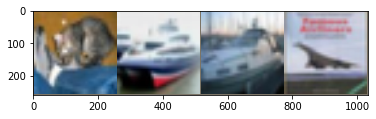

cat ship ship plane


In [3]:
# function to show an image
def imshow(img, convert_gpu=False):
    if convert_gpu:
        img = img.cpu()
        
    img = img.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    img = std * img + mean
    img = np.clip(img, 0, 1)
    
    plt.imshow(img)
    plt.show()


# show some test images
dataiter = iter(testloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]}' for j in range(4)))

# Build architecture

In [4]:
# class LeNet(nn.Module):
#     def __init__(self):
#         super(LeNet, self).__init__()
#         self.conv1 = nn.Conv2d(3, 6, 5)
#         self.pool = nn.MaxPool2d(2, 2)
#         self.conv2 = nn.Conv2d(6, 16, 5)
#         self.fc1 = nn.Linear(16 * 5 * 5, 120)
#         self.fc2 = nn.Linear(120, 84)
#         self.fc3 = nn.Linear(84, 10)

#     def forward(self, x):
#         x = self.pool(F.relu(self.conv1(x)))
#         x = self.pool(F.relu(self.conv2(x)))
#         x = x.view(-1, 16 * 5 * 5)
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = self.fc3(x)
#         return x


# net = LeNet()

In [5]:
%env TORCH_HOME=./data

env: TORCH_HOME=./data


In [6]:
# import ResNet-18
net = models.resnet18(pretrained=True)

In [7]:
for param in net.parameters():
    param.requires_grad = False

number_of_features = net.fc.in_features

net.fc = nn.Linear(number_of_features, 10)

In [8]:
criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(net.fc.parameters(), lr=0.001, momentum=0.9)

optimizer = optim.SGD(net.fc.parameters(), lr=0.001, momentum=0.9)

# GPU

In [9]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [10]:
if device.type == 'cuda':
    net.to(device)
    print('GPU Activated')

GPU Activated


# Train

In [11]:
writer = SummaryWriter('runs/lenet')

In [12]:
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader):
        # get the inputs; data is a list of [inputs, labels]
        if device.type == 'cuda':
            inputs, labels = data[0].to(device), data[1].to(device)
        else:
            inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        # backward
        loss.backward()
        # optimize
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'epoch: {epoch + 1} batches: {i + 1} loss: {running_loss / 2000:.3f}')
            writer.add_scalar('resnet train loss', running_loss / 2000, epoch * len(trainloader)//2000 + ((i+1) / 2000) - 1)
            running_loss = 0.0

print('Finished Training')

epoch: 1 batches: 2000 loss: 1.480
epoch: 1 batches: 4000 loss: 1.259
epoch: 1 batches: 6000 loss: 1.218
epoch: 1 batches: 8000 loss: 1.182
epoch: 1 batches: 10000 loss: 1.230
epoch: 1 batches: 12000 loss: 1.180
epoch: 2 batches: 2000 loss: 1.167
epoch: 2 batches: 4000 loss: 1.169
epoch: 2 batches: 6000 loss: 1.152
epoch: 2 batches: 8000 loss: 1.183
epoch: 2 batches: 10000 loss: 1.179
epoch: 2 batches: 12000 loss: 1.137
epoch: 3 batches: 2000 loss: 1.163
epoch: 3 batches: 4000 loss: 1.186
epoch: 3 batches: 6000 loss: 1.176
epoch: 3 batches: 8000 loss: 1.157
epoch: 3 batches: 10000 loss: 1.147
epoch: 3 batches: 12000 loss: 1.184
epoch: 4 batches: 2000 loss: 1.138
epoch: 4 batches: 4000 loss: 1.167
epoch: 4 batches: 6000 loss: 1.173
epoch: 4 batches: 8000 loss: 1.140
epoch: 4 batches: 10000 loss: 1.180
epoch: 4 batches: 12000 loss: 1.180
epoch: 5 batches: 2000 loss: 1.158
epoch: 5 batches: 4000 loss: 1.160
epoch: 5 batches: 6000 loss: 1.162
epoch: 5 batches: 8000 loss: 1.155
epoch: 5 bat

# Testing

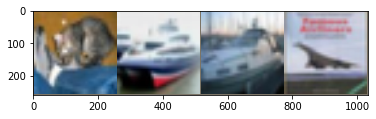

GroundTruth:  cat ship ship plane
Predicted:  frog horse horse bird
Accuracy of the network on the 10000 test images: 61.64 %


In [13]:
correct = 0
total = 0
with torch.no_grad():
    for i, data in enumerate(testloader):
        # get the inputs; data is a list of [inputs, labels]
        if device.type == 'cuda':
            images, labels = data[0].to(device), data[1].to(device)
        else:
            images, labels = data
        
        # get outputs
        outputs = net(images)
        
        # gather which class had highest prediction score
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        # Show prediction for 1st batch
        if i == 0:
            imshow(torchvision.utils.make_grid(images), device.type == 'cuda')
            print('GroundTruth: ', ' '.join(f'{classes[labels[j]]}' for j in range(4)))
            print('Predicted: ', ' '.join(f'{classes[predicted[j]]}' for j in range(4)))
            
            
print(f'Accuracy of the network on the 10000 test images: {100 * correct / total} %')